In [301]:
import pandas as pd
import yaml
import numpy as np
import matplotlib as plt
import matplotlib_inline
pd.options.mode.chained_assignment = None 
pd.set_option('chained_assignment',None)
import json

### Setup - Load Datasets

In [176]:
sales_2024 = pd.read_csv('Data/EtsySoldOrderItems2024.csv')

In [344]:
sales_2024['Month'] = sales_2024['Sale Date'].astype('datetime64[ns]').dt.month
sales_2024['Year'] = sales_2024['Sale Date'].astype('datetime64[ns]').dt.year
sales_2024['Year-Month'] = sales_2024['Sale Date'].astype('datetime64[ns]').dt.to_period('M')

In [202]:
sales_2024['Shorten Item Name'] = sales_2024.loc[:,['Item Name']]


for i in range(len(sales_2024['Item Name'])):
    try:
        slice_index = sales_2024.loc[i, 'Shorten Item Name'].index('|')
        sales_2024.loc[i,'Shorten Item Name'] = sales_2024.loc[i, 'Shorten Item Name'][:slice_index].strip()
    except Exception as err: 
        print(err)

substring not found
substring not found


In [203]:
print("Item Names with Description:")
print(sales_2024['Item Name'].unique())
#sales_2024.iloc[:,1]
#Custom Dashboard - Credit Card Expense Dashboard'

Item Names with Description:
['401K Savings Plan Dashboard | Google Sheets | Purple Theme | Up to 20 Plans'
 '5K Savings Challenge | Google Sheets | Rose Pink'
 'Debt Payoff Dashboard | Google Sheets | Beige'
 'Savings Garden Dashboard | Google Sheets | 4 Color Modes | Grow and Harvest your Sinking Funds'
 'Simple 50/30/20 Budget Dashboard | Google Sheets | Capybara Theme'
 'Zero Based Budget and Bill Calendar | Google Sheets | Warm Theme | Assign every dollar a Purpose | ADHD Budget'
 'Simple 50/30/20 Budget Dashboard | Google Sheets'
 'Monthly and Annual Dashboard | Google Sheets | 9 Color Modes | Coffee Theme'
 'Blueberry Theme Travels Planning Dashboard | Google Sheets | Your Travel Companion | Research and Track all Your Trips'
 'Ultimate Debt Dashboard | Google Sheets'
 'Scrolling Content Calendar Tracker | Google Sheets | Plan and Track Content Ideas'
 'Monthly and Annual Budget Dashboard | Google Sheets | 9 Color Modes | Cow Theme'
 'Custom Dashboard - Credit Card Expense Dashb

In [204]:
print('Item Names without Description:')
print(sales_2024['Shorten Item Name'].unique())

Item Names without Description:
['401K Savings Plan Dashboard' '5K Savings Challenge'
 'Debt Payoff Dashboard' 'Savings Garden Dashboard'
 'Simple 50/30/20 Budget Dashboard' 'Zero Based Budget and Bill Calendar'
 'Monthly and Annual Dashboard'
 'Blueberry Theme Travels Planning Dashboard' 'Ultimate Debt Dashboard'
 'Scrolling Content Calendar Tracker'
 'Monthly and Annual Budget Dashboard'
 'Custom Dashboard - Credit Card Expense Dashboard'
 'Career Level Up Tracker'
 'Household, Roommates & Couples Cost Splitter Dashboard'
 'Minimalist Calendar' 'Annual & Monthly Household Expense Spreadsheet'
 'Habits and Goals Scrolling Tracker' 'Ultimate Job Applications Tracker'
 'ATS Resume Builder Dashboard' 'Kawaii Calendar'
 'GoodNotes Bridal Planner' 'Tax Refund Dashboard' 'Life Planner'
 'Customizable Annual Budget Dashboard - Interactive Budgeting Tool with 17 Currencies and 3 Color Themes'
 'Bucket List Bingo' 'Perwinkle Forever Calendar'
 'Christmas Gifts Dashboard' 'Weather Theme Loan Tr

In [345]:
sales_2024.head()

,Sale Date,Item Name,Quantity,Price,Coupon Code,Coupon Details,Discount Amount,Shipping Discount,Order Shipping,Order Sales Tax,...,Date Shipped,Order ID,Order Type,Listings Type,Payment Type,VAT Paid by Buyer,Shorten Item Name,Month,Year,Year-Month
0,06/20/24,401K Savings Plan Dashboard | Google Sheets | ...,1,13.99,2024JUN;2024JUN;2024JUN;2024JUN,2024JUN - % off;2024JUN - % off;2024JUN - % of...,11.75,0.0,0,0,...,06/20/2024,3339778510,online,listing,online_cc,0.0,401K Savings Plan Dashboard,6,2024,2024-06
1,06/20/24,5K Savings Challenge | Google Sheets | Rose Pink,1,5.00,2024JUN;2024JUN;2024JUN;2024JUN,2024JUN - % off;2024JUN - % off;2024JUN - % of...,0.00,0.0,0,0,...,06/20/2024,3339778510,online,listing,online_cc,0.0,5K Savings Challenge,6,2024,2024-06
2,06/20/24,Debt Payoff Dashboard | Google Sheets | Beige,1,13.00,2024JUN;2024JUN;2024JUN;2024JUN,2024JUN - % off;2024JUN - % off;2024JUN - % of...,0.00,0.0,0,0,...,06/20/2024,3339778510,online,listing,online_cc,0.0,Debt Payoff Dashboard,6,2024,2024-06
3,06/20/24,Savings Garden Dashboard | Google Sheets | 4 C...,1,14.99,2024JUN;2024JUN;2024JUN;2024JUN,2024JUN - % off;2024JUN - % off;2024JUN - % of...,0.00,0.0,0,0,...,06/20/2024,3339778510,online,listing,online_cc,0.0,Savings Garden Dashboard,6,2024,2024-06
4,06/20/24,Simple 50/30/20 Budget Dashboard | Google Shee...,1,14.99,2024JUN,2024JUN - % off,3.75,0.0,0,0,...,06/20/2024,3339737098,online,listing,online_cc,0.0,Simple 50/30/20 Budget Dashboard,6,2024,2024-06


Models:
1. Moving Average - Baseline 
2. 

### Exploratory Analysis Charts

<Axes: ylabel='Shorten Item Name'>

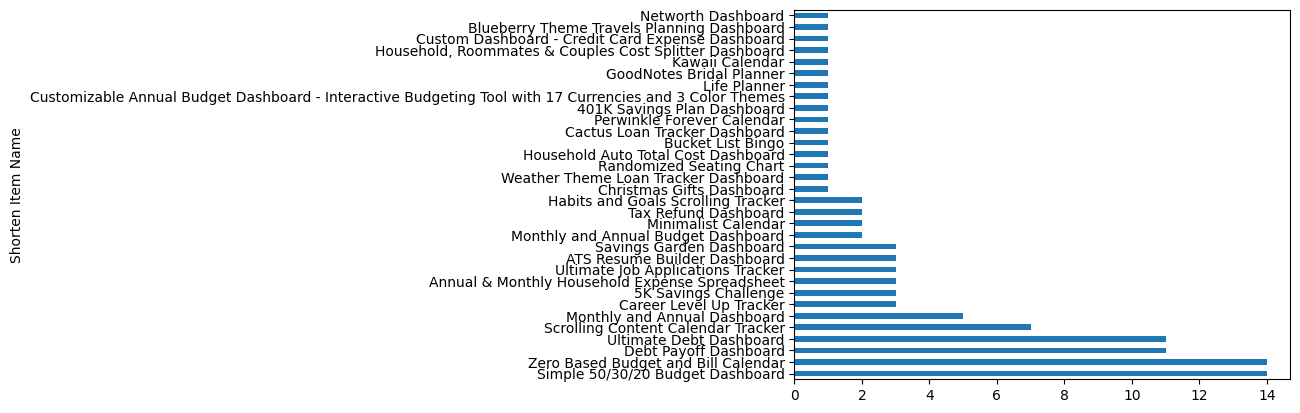

In [261]:
# Sales by Item
sales_2024['Shorten Item Name'].value_counts().plot.barh()

<Axes: xlabel='Month'>

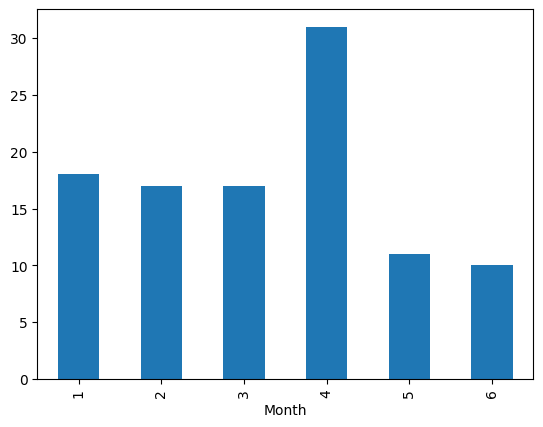

In [297]:
# Sales by Item
sales_2024['Month'].value_counts().sort_index().plot.bar()

In [379]:
monthly_sales = pd.DataFrame(sales_2024.groupby(['Year-Month', 'Shorten Item Name']).size().reset_index(name='Quantity'))
monthly_sales.columns = ['Month', 'Item', 'Quantity']
monthly_sales.head()

,Month,Item,Quantity
0,2024-01,Annual & Monthly Household Expense Spreadsheet,2
1,2024-01,Cactus Loan Tracker Dashboard,1
2,2024-01,Christmas Gifts Dashboard,1
3,2024-01,Debt Payoff Dashboard,2
4,2024-01,Household Auto Total Cost Dashboard,1


### Moving Average

In [420]:
def moving_average(input_df, extra_periods=1, n=3):

    ''' 
        Inputs:
            input_df - a dataframe with 3 columns: Month, Item, Quantity
            extra_periods - the # of months to forecast for
            n - the number of periods to average

    '''

    df = pd.DataFrame()

    # Obtain all items
    items = input_df['Item'].unique()

    for i in items: 
        item_quantity = input_df[input_df['Item']==i]

        # Add record for months with 0 Quantity
        # Ex. m = monthly_sales[monthly_sales['Item']== 'Tax Refund Dashboard']
        item_quantity =  item_quantity.set_index('Month').reindex(pd.period_range('2024-1','2024-6',freq='M'))
        item_quantity['Item'] = i
        item_quantity =  item_quantity.fillna(0)

        # Obtain the quantity
        d = item_quantity['Quantity']

        # Historical period length
        cols = len(d)

        # Append np.nan into the demand array to cover future periods
        d = np.append(d,[np.nan]*extra_periods)
        
        # Define the forecast array
        f = np.full(cols+extra_periods,np.nan)

        # Create all the t+1 forecast until end of historical period
        for t in range(n,cols):
            f[t] = np.mean(d[t-n:t])
            
        # Forecast for all extra periods
        f[t+1:] = np.mean(d[t-n+1:t+1])
        
        months = np.array(item_quantity.index.reindex(pd.period_range('2024-1','2024-7',freq='M')))
    
        # Return a DataFrame with the demand, forecast & error
        item_df = pd.DataFrame.from_dict({'Item':i , 'Month':months[0], 'Demand':d,'Forecast':f,'Error':d-f})
        df = pd.concat([df,item_df])
        #df.append(item_df, ignore_index = True) 
        
    return df

In [431]:
moving_average_model = moving_average(monthly_sales,n=3)
m = moving_average_model[moving_average_model['Item'] == 'Simple 50/30/20 Budget Dashboard']

([<matplotlib.axis.XTick at 0x73a56a6d58d0>,
 [Text(0, 0, '2024-01'),
  Text(1, 0, '2024-02'),
  Text(2, 0, '2024-03'),
  Text(3, 0, '2024-04'),
  Text(4, 0, '2024-05'),
  Text(5, 0, '2024-06'),
  Text(6, 0, '2024-07')])

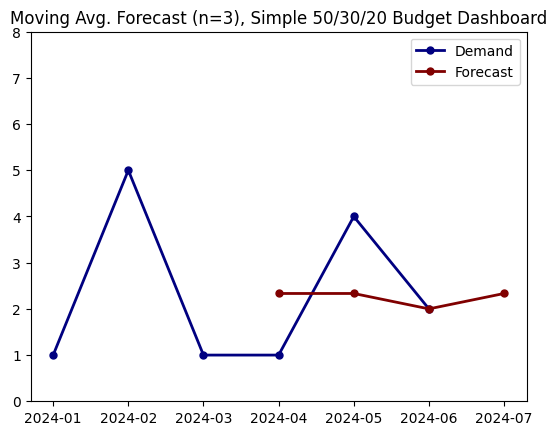

In [481]:
x_ticks=np.array(m['Month'].astype(str))
ax = m[['Demand', 'Forecast']].plot(lw=2,
                                    #xticks= {'Jan. 2024', 'Feb. 2024', 'Mar, 2024', 'Apr. 2024', 'May 2024','Jun. 2024',
                                             #'Jul. 2024'},
                                    colormap='jet', 
                                    marker='.',
                                    markersize=10, 
                                    title='Moving Avg. Forecast (n=3), Simple 50/30/20 Budget Dashboard').set_ylim(0,8)
plt.pyplot.xticks(np.arange(7), x_ticks)

#### Limitations of Moving Average Model 

1. No Trend - the model does not see any trend and therefore won't project any 
2. No Seasonality 
3. Flat Historical Weighting - allocates equal weight to all the historical periods. For ex. n=4 means that each period has a weight/importance of 25%